In [1]:
# import os
# import torch
# from torchsummary import summary
# from torch.autograd import Variable
# from torchviz import make_dot
# from urbansounds import UrbanSoundDataset
# from torch.utils.data import random_split
# import torchaudio
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt
# import time
# import numpy as np

In [2]:
import os
cwd = os.getcwd()

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [3]:
from torch import nn
from torch import optim

class CNN_ReLU(nn.Module):

    def __init__(self):
        super().__init__()
        # 4 conv blocks / flatten / linear / softmax
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(7680, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.flatten(x)
        logits = self.linear(x)
        # predictions = self.softmax(logits)
        return logits
    
    def get_loss(self, learning_rate):
        loss = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        return loss, optimizer

In [4]:
class CNN_LeakyReLU(nn.Module):

    def __init__(self):
        super().__init__()
        # 4 conv blocks / flatten / linear / softmax
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=2
            ),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=2
            ),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=2
            ),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=2
            ),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2),
        )
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(7680, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.flatten(x)
        logits = self.linear(x)
        # predictions = self.softmax(logits)
        return logits
    
    def get_loss(self, learning_rate):
        loss = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        return loss, optimizer
    
class CNN_Tanh(nn.Module):

    def __init__(self):
        super().__init__()
        # 4 conv blocks / flatten / linear / softmax
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=2
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=2
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=2
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=2
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(7680, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.flatten(x)
        logits = self.linear(x)
        # predictions = self.softmax(logits)
        return logits
    
    def get_loss(self, learning_rate):
        loss = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        return loss, optimizer
    
class CNN_Sigmoid(nn.Module):

    def __init__(self):
        super().__init__()
        # 4 conv blocks / flatten / linear / softmax
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=2
            ),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=2
            ),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=2
            ),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=2
            ),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(7680, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.flatten(x)
        logits = self.linear(x)
        # predictions = self.softmax(logits)
        return logits
    
    def get_loss(self, learning_rate):
        loss = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        return loss, optimizer

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 16, 66, 175]             160
              Tanh-2          [-1, 16, 66, 175]               0
         MaxPool2d-3           [-1, 16, 33, 87]               0
            Conv2d-4           [-1, 32, 35, 89]           4,640
              Tanh-5           [-1, 32, 35, 89]               0
         MaxPool2d-6           [-1, 32, 17, 44]               0
            Conv2d-7           [-1, 64, 19, 46]          18,496
              Tanh-8           [-1, 64, 19, 46]               0
         MaxPool2d-9            [-1, 64, 9, 23]               0
           Conv2d-10          [-1, 128, 11, 25]          73,856
             Tanh-11          [-1, 128, 11, 25]               0
        MaxPool2d-12           [-1, 128, 5, 12]               0
          Flatten-13                 [-1, 7680]               0
           Linear-14                   

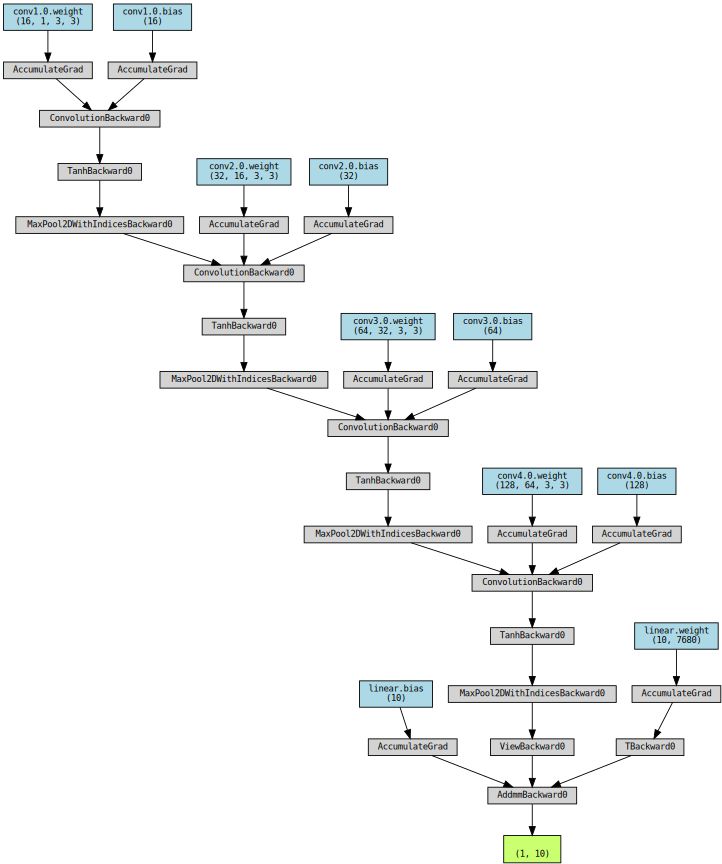

In [5]:
from torchsummary import summary
from torch.autograd import Variable
from torchviz import make_dot

IDEAL_INPUT_SIZE = (1, 64, 173)

cnn_relu = CNN_ReLU().to(device)
cnn_leaky = CNN_LeakyReLU().to(device)
cnn_tanh = CNN_Tanh().to(device)
cnn_sigmoid = CNN_Sigmoid().to(device)

def visualize_cnn(cnn, device, input_size):
    fake_input = Variable(torch.zeros((1, input_size[0], input_size[1], input_size[2]))).to(device)
    outputs = cnn(fake_input)
    return make_dot(outputs, dict(cnn.named_parameters()))

summary(cnn_tanh, IDEAL_INPUT_SIZE)
visualize_cnn(cnn_tanh, device, IDEAL_INPUT_SIZE)

In [6]:
import torchaudio

class LogMelSpectrogram(torch.nn.Module):
    def __init__(self, sample_rate, n_fft=1024, hop_length=512, n_mels=64):
        super().__init__()
        self.mel_spectrogram = torchaudio.transforms.MelSpectrogram(
            sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
        )
    
    def forward(self, waveform):
        mel_spec = self.mel_spectrogram(waveform)
        log_mel_spec = torch.log(mel_spec + 1e-10)
        
        return log_mel_spec

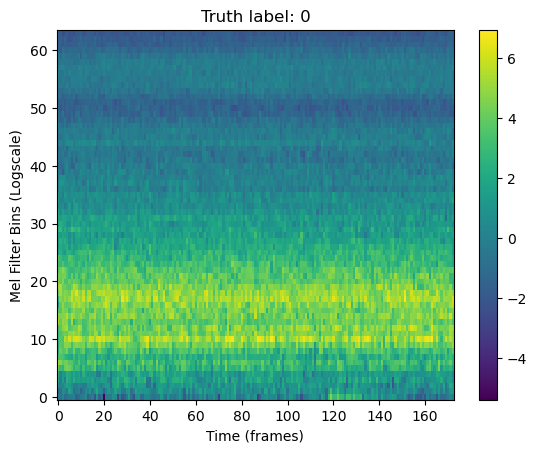

In [7]:
from urbansounds import UrbanSoundDataset
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

SAMPLE_RATE = 22050
NUM_SAMPLES = SAMPLE_RATE*4
BATCH_SIZE = 64


mel_spectrogram = LogMelSpectrogram(
    sample_rate=SAMPLE_RATE, n_fft=1024, hop_length=512, n_mels=64
)

usd = UrbanSoundDataset(
    annotations_file=f"{cwd}/UrbanSound8K/metadata/UrbanSound8K.csv", 
    audio_dir=f"{cwd}/UrbanSound8K/audio", 
    transformation=mel_spectrogram, 
    target_sample_rate=SAMPLE_RATE, 
    num_samples=NUM_SAMPLES, 
    device=device
)

def split_data(dataset, train_split=0.7, val_split=0.15, test_split=0.15):
    assert abs(train_split + val_split + test_split - 1.0) < 1e-6, "Splits must sum to 1"
    train_size = int(train_split * len(dataset))
    val_size = int(val_split * len(dataset))
    test_size = len(dataset) - train_size - val_size
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    
    return train_dataset, val_dataset, test_dataset

def create_data_loader(dataset, batch_size):
    dataloader = DataLoader(dataset, batch_size)
    return dataloader   


train_dataset, val_dataset, test_dataset = split_data(usd, train_split=0.7, val_split=0.15, test_split=0.15)
train_loader = create_data_loader(train_dataset, BATCH_SIZE) # size 6112
val_loader = create_data_loader(val_dataset, batch_size=256) # size 1309
test_loader = create_data_loader(test_dataset, batch_size=256) # size 1311

def plot_mel_spectrogram(mel_spec, title):
    mel_spec = mel_spec.squeeze().cpu().numpy()  # Remove batch and channel dimensions, if any
    fig, ax = plt.subplots()
    img = ax.imshow(mel_spec, interpolation='nearest', aspect='auto', origin='lower')
    ax.set_title(title)
    plt.xlabel("Time (frames)")
    plt.ylabel("Mel Filter Bins (Logscale)")
    fig.colorbar(img, ax=ax)
    plt.show()

for i in range(1, 2):
    mel_spec, label = train_dataset[i]
    plot_mel_spectrogram(mel_spec, f"Truth label: {label}")

In [8]:
import time

EPOCHS = 10
LEARNING_RATE = 0.001

def train_cnn(cnn,
            train_loader=train_loader,
            val_loader=val_loader,
            test_loader=test_loader,
            n_epochs=EPOCHS,
            learning_rate=LEARNING_RATE):
    """ 
    Train a the specified network.

        Outputs a tuple with the following five elements
        train_index
        train_losses
        val_index
        val_losses
        accuracy
    """ 
    loss, optimizer = cnn.get_loss(learning_rate)
    print_every = 32
    idx = 0

    train_index = []
    train_losses = []
    val_index = []
    val_losses = []
    accuracies = []

    training_start_time = time.time()

    for epoch in range(n_epochs):
        running_loss = 0.0
        start_time = time.time()

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
            
            # reset optimizer gradient
            optimizer.zero_grad()

            # forward pass
            outputs = cnn(inputs)

            loss_size = loss(outputs, labels)
            loss_size.backward()
            optimizer.step()
            
            # update stats
            running_loss += loss_size.data.item()
            
            # print every nth batch of an epoch
            if (i % print_every) == print_every-1:
                print(f"Epoch {epoch + 1}, Iteration {i + 1}\t train_loss: {running_loss / print_every:.2f} took: {time.time() - start_time:.2f}s")
                # Reset running loss and time
                train_losses.append(running_loss / print_every)
                train_index.append(idx)
                running_loss = 0.0
                start_time = time.time()
            idx += 1

        # validation pass at the end of each epoch
        total_val_loss = 0
        for inputs, labels in val_loader:
            inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)

            # forward pass
            val_outputs = cnn(inputs)
            val_loss_size = loss(val_outputs, labels)
            total_val_loss += val_loss_size.data.item()
        val_losses.append(total_val_loss / len(test_loader))
        val_index.append(idx)
        print(f"Validation loss = {total_val_loss / len(test_loader):.2f}")

        
        # test pass at the end of each epoch
        correct = 0
        total = 0
        with torch.no_grad():  # Disable gradient calculation for validation/testing
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # forward pass
                test_outputs = cnn(inputs)

                # get predictions (index of the max logit)
                _, predicted = torch.max(test_outputs, 1)

                # update total and correct predictions count
                total += labels.size(0)  # total number of samples
                correct += (predicted == labels).sum().item()  # count of correct predictions

        # calculate and store accuracy for this epoch
        accuracy = correct / total
        accuracies.append(accuracy)
        print(f"Accuracy = {accuracy:.2f}")

    print("Training finished, took {:.2f}s".format(
        time.time() - training_start_time))
    
    return {
        'train_index': train_index,
        'train_losses': train_losses,
        'val_index': val_index,
        'val_losses': val_losses,
        'accuracies': accuracies
    }

In [9]:
relu_results = train_cnn(cnn_relu)
leaky_results = train_cnn(cnn_leaky)
tanh_results = train_cnn(cnn_tanh)
sigmoid_results = train_cnn(cnn_sigmoid)

Epoch 1, Iteration 32	 train_loss: 1.85 took: 15.18s
Epoch 1, Iteration 64	 train_loss: 1.38 took: 14.27s
Epoch 1, Iteration 96	 train_loss: 1.16 took: 12.58s
Validation loss = 1.00
Accuracy = 0.67
Epoch 2, Iteration 32	 train_loss: 0.91 took: 13.23s
Epoch 2, Iteration 64	 train_loss: 0.84 took: 13.04s
Epoch 2, Iteration 96	 train_loss: 0.74 took: 12.39s
Validation loss = 0.72
Accuracy = 0.76
Epoch 3, Iteration 32	 train_loss: 0.64 took: 14.88s
Epoch 3, Iteration 64	 train_loss: 0.61 took: 14.25s
Epoch 3, Iteration 96	 train_loss: 0.54 took: 16.14s
Validation loss = 0.56
Accuracy = 0.80
Epoch 4, Iteration 32	 train_loss: 0.45 took: 14.54s
Epoch 4, Iteration 64	 train_loss: 0.43 took: 15.45s
Epoch 4, Iteration 96	 train_loss: 0.42 took: 12.90s
Validation loss = 0.46
Accuracy = 0.84
Epoch 5, Iteration 32	 train_loss: 0.32 took: 16.59s
Epoch 5, Iteration 64	 train_loss: 0.28 took: 16.98s
Epoch 5, Iteration 96	 train_loss: 0.33 took: 15.43s
Validation loss = 0.46
Accuracy = 0.84
Epoch 6, I

In [10]:
import json

results = {
    'relu': relu_results,
    'leaky_relu': leaky_results,
    'tanh': tanh_results,
    'sigmoid': sigmoid_results
}

result_output_path = os.path.join(cwd, 'results.json')
with open(result_output_path, 'w') as json_file:
    json.dump(results, json_file, indent=4)

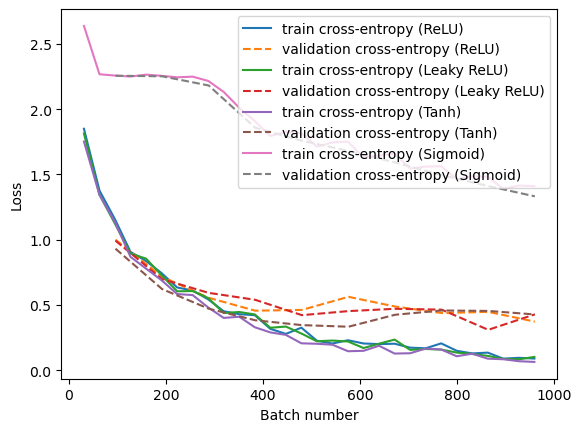

In [22]:
plt.plot(relu_results['train_index'],relu_results['train_losses'])
plt.plot(relu_results['val_index'], relu_results['val_losses'], '--')

plt.plot(leaky_results['train_index'],leaky_results['train_losses'])
plt.plot(leaky_results['val_index'], leaky_results['val_losses'], '--')

plt.plot(tanh_results['train_index'],tanh_results['train_losses'])
plt.plot(tanh_results['val_index'], tanh_results['val_losses'], '--')

plt.plot(sigmoid_results['train_index'],sigmoid_results['train_losses'])
plt.plot(sigmoid_results['val_index'], sigmoid_results['val_losses'], '--')

plt.legend(['train cross-entropy (ReLU)', 'validation cross-entropy (ReLU)',
            'train cross-entropy (Leaky ReLU)', 'validation cross-entropy (Leaky ReLU)',
            'train cross-entropy (Tanh)', 'validation cross-entropy (Tanh)',
            'train cross-entropy (Sigmoid)', 'validation cross-entropy (Sigmoid)'])
plt.xlabel('Batch number')
plt.ylabel('Loss')

plot_path = os.path.join(cwd, 'training_loss_plot.png')
plt.savefig(plot_path)

plt.show()

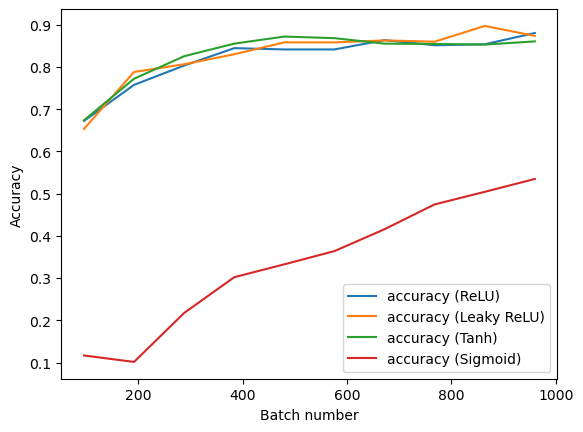

In [23]:
plt.plot(relu_results['val_index'], relu_results['accuracies'])
plt.plot(leaky_results['val_index'], leaky_results['accuracies'])
plt.plot(tanh_results['val_index'], tanh_results['accuracies'])
plt.plot(sigmoid_results['val_index'], sigmoid_results['accuracies'])


plt.legend(['accuracy (ReLU)',
            'accuracy (Leaky ReLU)',
            'accuracy (Tanh)',
            'accuracy (Sigmoid)'])
plt.xlabel('Batch number')
plt.ylabel('Accuracy')

plot_path = os.path.join(cwd, 'accuracy_plot.png')
plt.savefig(plot_path)

plt.show()